In [41]:
import numpy as np
import matplotlib.pyplot as plt


#amplitudska modulacija, osnovni oblik
Ac = 1.0 #amplituda nosioca
fc = 150.0 #ucestanost nosioca
Am = 3.0 #amplituda modulisuceg signala (signal koji nosi informaciju)
fm = 10.0 #ucestanost modulisuceg signala
t = np.linspace(0, 1, 1000)

carrier = Ac * np.cos(2*np.pi*fc*t) #nosilac
modulator = Am * np.cos(2*np.pi*fm*t) #modulisuci signal (nosilac infomracije, data)
am_signal = Ac * np.cos(2*np.pi*fc*t) * Am * np.cos(2*np.pi*fm*t)


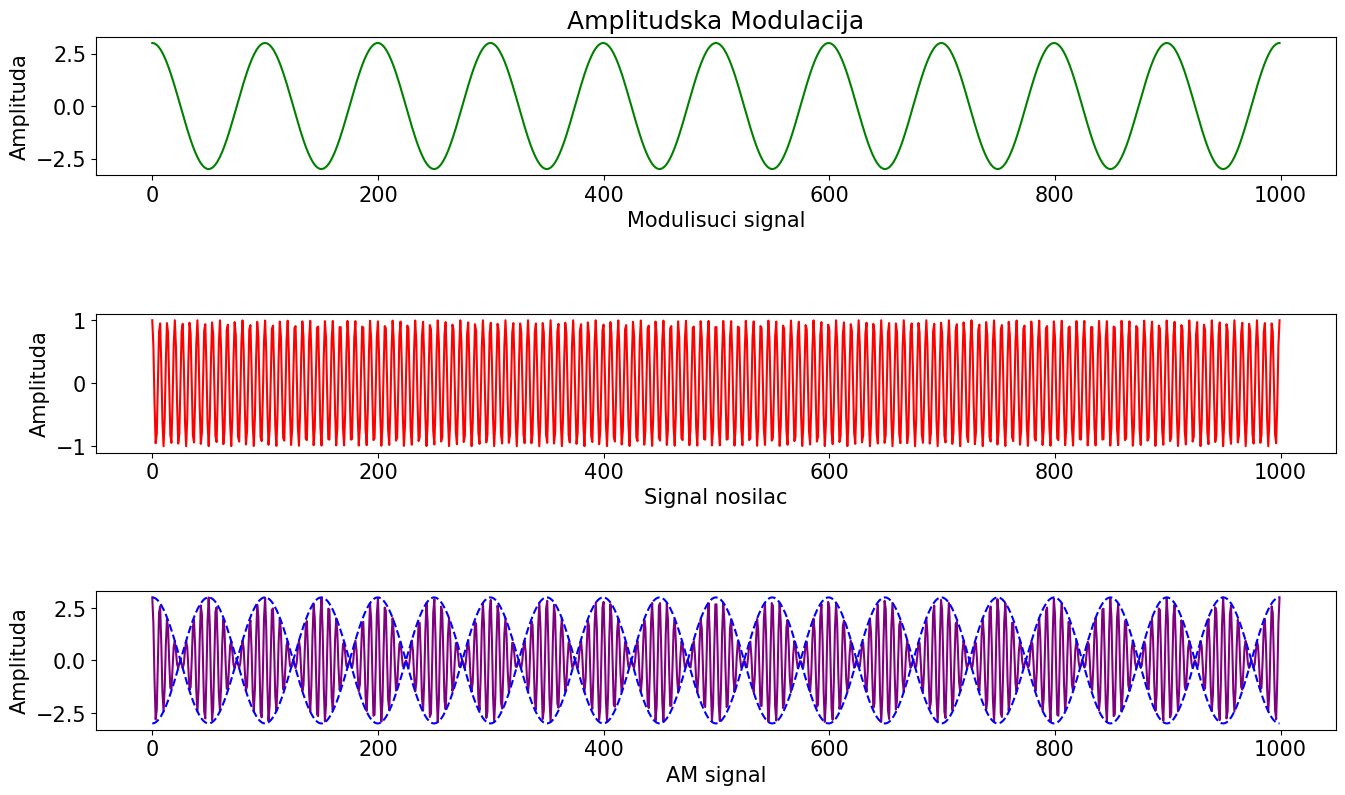

In [42]:
plt.subplot(3,1,1)
plt.title('Amplitudska Modulacija')
plt.plot(modulator,'g')
plt.ylabel('Amplituda')
plt.xlabel('Modulisuci signal')

plt.subplot(3,1,2)
plt.plot(carrier, 'r')
plt.ylabel('Amplituda')
plt.xlabel('Signal nosilac')

plt.subplot(3,1,3)
plt.plot(am_signal, color="purple")
plt.plot(modulator, 'b--')
plt.plot(-1*modulator, 'b--')
plt.ylabel('Amplituda')
plt.xlabel('AM signal')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)


In [21]:
#koherentna amplitudska 
from scipy import signal as sig
t = np.linspace(0, 1, 1000)  
demod_signal1 = am_signal * Ac * np.cos(2*np.pi*fc*t) #mnozenje AM signala signalom lokalnog oscilatora koji je isti kao i signal nosilac i optimalno ima fazni pomeraj 0
sos = sig.butter(10, fm, btype = 'lowpass', analog = True, output = 'sos')
demod_signal = sig.sosfilt(sos, demod_signal1)





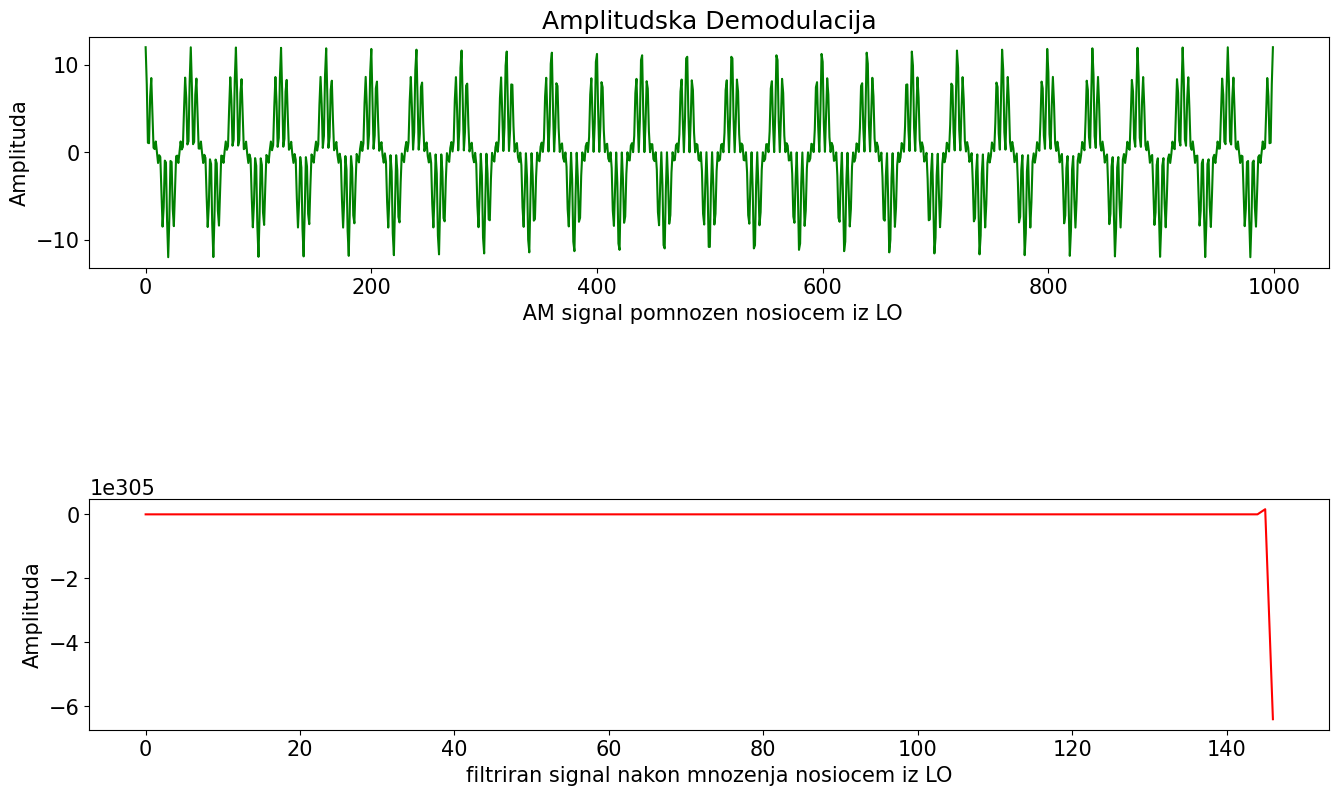

In [43]:
plt.subplot(2,1,1)
plt.title('Amplitudska Demodulacija')
plt.plot(demod_signal1,'g')
plt.ylabel('Amplituda')
plt.xlabel(' AM signal pomnozen nosiocem iz LO')

plt.subplot(2,1,2)
plt.plot(demod_signal2, 'r')
plt.ylabel('Amplituda')
plt.xlabel('filtriran signal nakon mnozenja nosiocem iz LO')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 9)